In [148]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import pandas as pd
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.pandas.set_option('display.max_columns', None)

import pickle
import warnings
warnings.simplefilter(action='ignore')

from sklearn.compose import TransformedTargetRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import Pipeline, make_pipeline
from xgboost.sklearn import XGBRegressor

The estimators that will be assessed in this jupyter notebook are:
ElasticNet, RandomForestRegressor, XGBRegressor

In [149]:
project_path = r'C:\Users\kchanas\Documents\Learning\Kaggle\House Prices'
X_train = pd.read_csv(os.path.join(project_path, r'data\X_train.csv'), index_col=0)
y_train = pd.read_csv(os.path.join(project_path, r'data\y_train.csv'), index_col=0, names=['SalePrice'])
X_test = pd.read_csv(os.path.join(project_path, r'data\X_test.csv'), index_col=0)
y_test = pd.read_csv(os.path.join(project_path, r'data\y_test.csv'), index_col=0, names=['SalePrice'])

In [150]:
with open(os.path.join(project_path, r'data\selected_features.txt'), "rb") as f:
      selected_features = pickle.load(f)

In [159]:
print(selected_features)

['OverallQual', 'OverallCond', 'GarageCars', 'MSZoning', 'Neighborhood', 'BsmtExposure', 'CentralAir', 'KitchenQual', 'FireplaceQu', 'GarageType', 'SaleCondition', 'LotArea', 'BsmtFinSF1', '1stFlrSF', 'GrLivArea', 'GrLivAndBsmtArea', 'YearBuilt', 'YearRemodAdd']


In [152]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [153]:
pipe_en = Pipeline([
                   ('model', TransformedTargetRegressor(ElasticNet(random_state=1),func = np.log, inverse_func=np.exp))
])

pipe_rf = Pipeline([
                       ('model', TransformedTargetRegressor(RandomForestRegressor(oob_score=True, random_state=1),
                                                            func = np.log, inverse_func=np.exp))
])

pipe_xgb = Pipeline([
                       ('model', TransformedTargetRegressor(XGBRegressor(random_state=1),func = np.log, inverse_func=np.exp))
])

In [154]:
grid_params_en = {'model__regressor__alpha':np.linspace(0.02,1,5),
                 'model__regressor__l1_ratio': np.linspace(0,1,5)
}

grid_params_rf = {'model__regressor__n_estimators':[100, 200, 300, 400]    
}

grid_params_xgb = {'model__regressor__learning_rate':[0.001, 0.01, 0.05, 0.1],
                 'model__regressor__n_estimators':[100, 200, 300, 400]
                 }

In [155]:
models_names = ['ElasticNet', 'RandomForest', 'XGB']
models = [pipe_en, pipe_rf, pipe_xgb]
grid_params = [grid_params_en, grid_params_rf, grid_params_xgb]

In [156]:
cv = KFold(n_splits=10, random_state=1)
jobs = -1
n_search = []
for model, grid_param in zip(models, grid_params):
    n_search.append(GridSearchCV(estimator=model, param_grid=grid_param, scoring='r2',cv=cv,verbose=1)) 

In [157]:
best_models = {}
for model_name, search in zip(models_names, n_search):
    search.fit(X_train, y_train)
    best_models[model_name] = (search.best_estimator_, search.best_score_, search.best_params_)
    print(model_name, "Best parameter (CV score=%0.3f):" % search.best_score_)
    print(search.best_params_)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    7.0s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=False),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('model',
                                        TransformedTargetRegressor(check_inverse=True,
                                                                   func=<ufunc 'log'>,
                                                                   inverse_func=<ufunc 'exp'>,
                                                                   regressor=ElasticNet(alpha=1.0,
                                                                                        copy_X=True,
                                                                                        fit_intercept=True,
                                                                                        l1_ratio=0.5,
                                                                                        max_iter=1000,
           

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ElasticNet Best parameter (CV score=0.845):
{'model__regressor__alpha': 0.02, 'model__regressor__l1_ratio': 0.0}
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.3min finished


GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=False),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('model',
                                        TransformedTargetRegressor(check_inverse=True,
                                                                   func=<ufunc 'log'>,
                                                                   inverse_func=<ufunc 'exp'>,
                                                                   regressor=RandomForestRegressor(bootstrap=True,
                                                                                                   criterion='mse',
                                                                                                   max_depth=None,
                                                                                                   max_features='auto',
                                                          

RandomForest Best parameter (CV score=0.871):
{'model__regressor__n_estimators': 300}
Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:   49.8s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=False),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('model',
                                        TransformedTargetRegressor(check_inverse=True,
                                                                   func=<ufunc 'log'>,
                                                                   inverse_func=<ufunc 'exp'>,
                                                                   regressor=XGBRegressor(base_score=0.5,
                                                                                          booster='gbtree',
                                                                                          colsample_bylevel=1,
                                                                                          colsample_bytree=1,
                                                                                         

XGB Best parameter (CV score=0.893):
{'model__regressor__learning_rate': 0.05, 'model__regressor__n_estimators': 400}


(0, 745000.0)

(0, 745000.0)

[Text(0, 0.5, 'prediction'),
 Text(0.5, 0, 'target'),
 Text(0.5, 1.0, 'ElasticNet, R2: 0.894')]

test mse: 756506275
test rmse: 27504
test r2: 0.8939270496241561


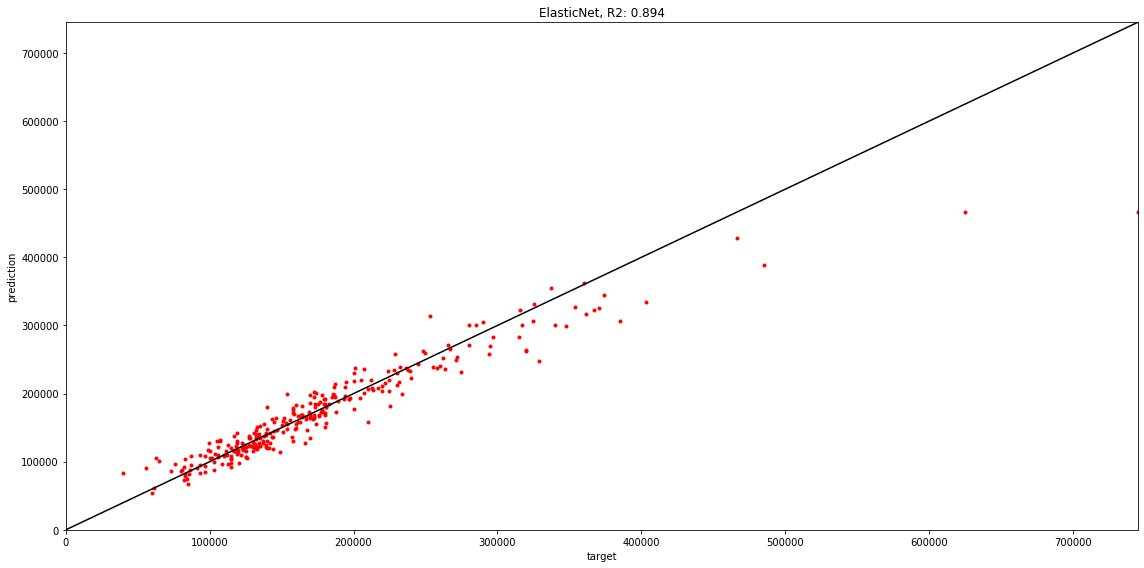

(0, 745000.0)

(0, 745000.0)

[Text(0, 0.5, 'prediction'),
 Text(0.5, 0, 'target'),
 Text(0.5, 1.0, 'RandomForest, R2: 0.900')]

test mse: 716194481
test rmse: 26761
test r2: 0.899579337152452


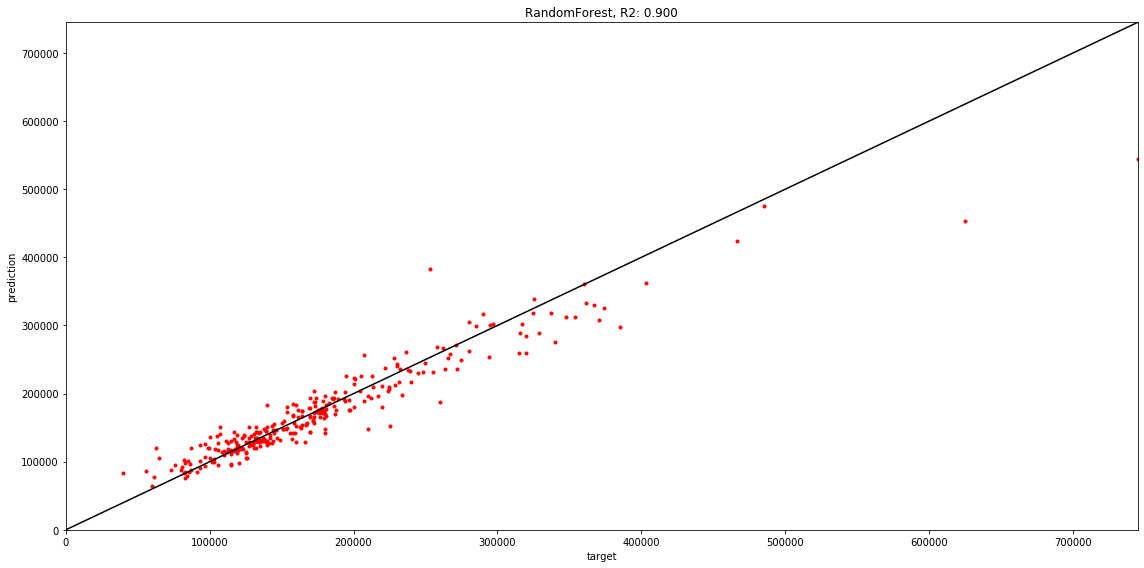

(0, 745000.0)

(0, 745000.0)

[Text(0, 0.5, 'prediction'),
 Text(0.5, 0, 'target'),
 Text(0.5, 1.0, 'XGB, R2: 0.907')]

test mse: 665289751
test rmse: 25793
test r2: 0.9067169050156058


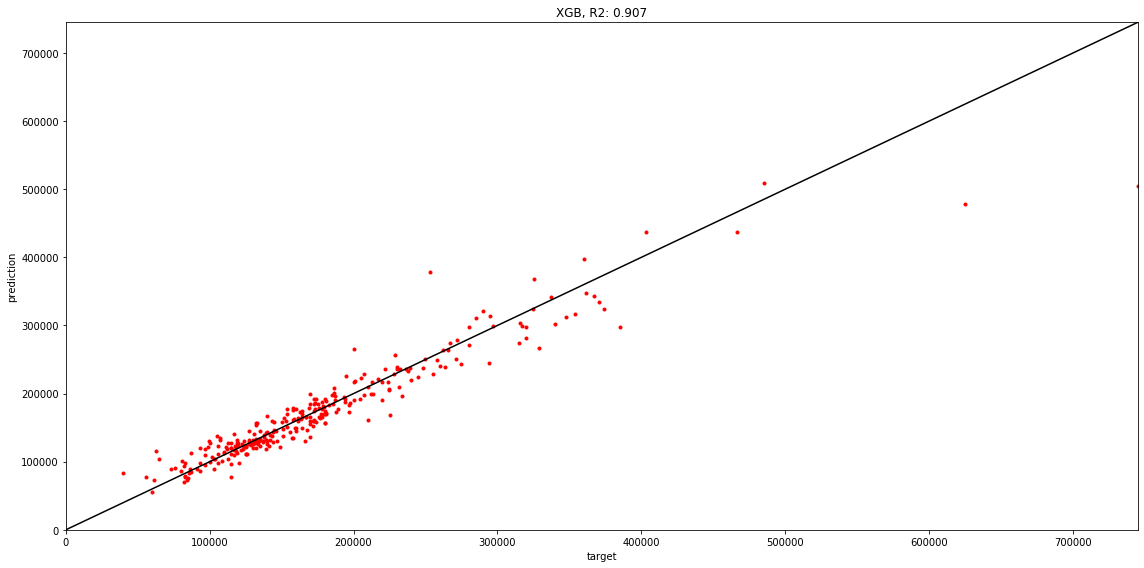

In [158]:
for model_name in models_names:
    pred = best_models[model_name][0].predict(X_test)
    #pred = np.exp(pred)
    fig, ax = plt.subplots(figsize=(16,8))
    ax_max = np.ceil(np.max([y_test.max().iloc[0], pred.max()])/10) *10
    ax.plot(y_test, pred, 'r.', label='Actual')
    ax.plot([0, ax_max], [0,ax_max], 'k-' , label='Equal')
    ax.set_ylim(0,ax_max)
    ax.set_xlim(0,ax_max)
    r2 = r2_score(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    ax.set(title=f"{model_name}, R2: {r2:0.3f}" , xlabel='target', ylabel='prediction')
    fig.tight_layout()
    # determine mse and rmse
    print('test mse: {}'.format(int(
        mean_squared_error(y_test, pred))))
    print('test rmse: {}'.format(int(
        np.sqrt(mean_squared_error(y_test, pred)))))
    print('test r2: {}'.format(
        r2_score(y_test, pred)))
    plt.show()

The best estimator is XGRegressor with learning_rate = 0.5 and n_estimators = 400. The r2_score for this estimator is 0.907.